# Big Data. TD 2

 **EX1**:    
 Réaliser un algorithme de tri de complexité quadratique, par exemple, le tri à bulles.
 L’algorithme doit prendre en entrée une liste d’entiers et retourner une liste triée.

In [ ]:
def tri_a_bulle(T):
    n= len(T)
    for i in range(n):
        for j in range(n-i-1):
            if T[j+1] < T[j]:
                T[j+1],T[j] = T[j],T[j+1]
    return T

**EX2**:  
Tester votre implémentation en utilisant :
- un petit exemple,
- une liste vide,
- une liste aléatoire de 1000 nombres.
  
Pour vous assurer que votre solution fonctionne bien pour les grandes listes, utilisez une fonction build-in pour vérifier votre résultat (par exemple sorted() en python).

In [ ]:
#test avec petits exemples
T = [5,3,6,2,1,4,8,7,9,0]
L = [5,3,6,2,1,4,8,7,9,0,14,13,15,12,11,10]

A= tri_a_bulle(T)
B= tri_a_bulle(L)
print(B)
print(A)

#test avec liste vide
V=[]
print(tri_a_bulle(V))  #ça donne une liste vide

#test avce liste aléatoire de 1000 nombres
import random
M = [random.randint(0,1000) for _ in range(1000)]
#print(tri_a_bulle(M))
print(sorted(M) == tri_a_bulle(M))  #pour vérifier que c'est bien trié

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[]
True


**EX3**  
Réaliser et tester de la même manière une fonction de tri de complexité O(nlog(n)), par exemple, tri fusion. Si vous avez besoin de fonctions d’aide pour implémenter votre algorithme, par exemple, si vous avez besoin d’une fonction merge() pour fusionner deux tableaux triés, implémentez une classe.   

Cette classe doit être initialisée avec une liste de nombres et doit contenir une fonction qui
renvoie une liste triée.

In [ ]:
def tri_fusion(T):
    if len(T) <= 1:
        return T
    mid = len(T) // 2
    left_half = tri_fusion(T[:mid])   #T[:mid] est le sous-tableau de T allant de l'indice 0 à mid-1
    right_half = tri_fusion(T[mid:])  #T[mid:] est le sous-tableau de T allant de l'indice mid à la fin de T
    
    sorted_list = []
    i = j = 0
    
    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            sorted_list.append(left_half[i])
            i += 1
        else:
            sorted_list.append(right_half[j])
            j += 1
    
    sorted_list.extend(left_half[i:])  #ajoute les éléments restants de left_half
    sorted_list.extend(right_half[j:]) #ajoute les éléments restants de right_half
    
    return sorted_list


#test avec petits exemples
T = [5,3,6,2,1,4,8,7,9,0]
L = [5,3,6,2,1,4,8,7,9,0,14,13,15,12,11,10]

A= tri_fusion(T)
B= tri_fusion(L)
print(B)
print(A)

#test avec liste vide
V=[]
print(tri_fusion(V))  #ça donne une liste vide

#test avce liste aléatoire de 1000 nombres
import random
M = [random.randint(0,1000) for _ in range(1000)]
#print(tri_fusion(M))
print(sorted(M) == tri_fusion(M))  #pour vérifier que c'est bien trié



##
C=['a','g','h','f','e','d','c','b']
print(tri_fusion(C))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[]
True
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']


**EX4**:  
Félicitations, vous avez maintenant deux algorithmes de tri! Généralisez-les pour qu’ils puissent trier des entrées triables arbitraires, et pas seulement des nombres. Pour ce faire, ajoutez un argument key à votre fonction de tri.  
Cet argument est une fonction de transformation qui peut être appliquée à vos données avant les comparaisons. Par défaut, ce devrait être une fonction identité (lambda x : x en python).

In [ ]:
#tri a bulle generalisé
def tri_a_bulle(T, key=lambda x: x):
    n = len(T)
    for i in range(n):
        for j in range(n - i - 1):
            if key(T[j + 1]) < key(T[j]):
                T[j + 1], T[j] = T[j], T[j + 1]
    return T

#tri par fusion generalisé
def tri_fusion(T, key=lambda x: x):
    if len(T) <= 1:
        return T

    mid = len(T) // 2
    left_half = tri_fusion(T[:mid], key)
    right_half = tri_fusion(T[mid:], key)

    sorted_list = []
    i = j = 0

    while i < len(left_half) and j < len(right_half):
        if key(left_half[i]) < key(right_half[j]):
            sorted_list.append(left_half[i])
            i += 1
        else:
            sorted_list.append(right_half[j])
            j += 1

    sorted_list.extend(left_half[i:])
    sorted_list.extend(right_half[j:])
    return sorted_list

###tests avec des dictionnaires
data1 = [{'nom': 'Alice', 'age': 30}, {'nom': 'Bob', 'age': 25}, {'nom': 'Charlie', 'age': 35}]
data2 = [{'nom': 'Alice', 'age': 30}, {'nom': 'Bob', 'age': 25}, {'nom': 'Charlie', 'age': 35}]

# Tri par âge
print(tri_a_bulle(data1, key=lambda x: x['nom']))
print(tri_fusion(data2, key=lambda x: x['age']))

[{'nom': 'Alice', 'age': 30}, {'nom': 'Bob', 'age': 25}, {'nom': 'Charlie', 'age': 35}]
[{'nom': 'Bob', 'age': 25}, {'nom': 'Alice', 'age': 30}, {'nom': 'Charlie', 'age': 35}]


**EX5**:  
Testez votre solution sur une petite liste de chaînes de caractères en les triant par longueur.

In [ ]:
#######################tests avec des chaînes de caractères
L1 = ['apple', 'banana', 'cherry', 'date']
L2 = ['kiwi', 'fig', 'grape', 'elderberry']

print(tri_a_bulle(L1, key=len))  # Trie par longueur de chaîne
print(tri_fusion(L2, key=len))    # Trie par longueur de chaîne

['date', 'apple', 'banana', 'cherry']
['fig', 'kiwi', 'grape', 'elderberry']


**EX6**
Maintenant, testez vos algorithmes sur les données du TD précédent et obtenez desmesures empiriques de la complexité temporelle. En utilisant les données du TD précédent, préparez plusieurs fichiers de tailles différentes tels que :
- les fichier scontiennent un sous-ensemble aléatoire de lignes du fichier d’origine *https://kirgizov.link/teaching/polytech-dijon/bigdata/dataset/wikirank-fr-v2.tsv.zip*
- la colonne de popularité ne contient que des flottants, pas de NaN ou des str
- préparer de 5 à 10 fichiers de tailles différentes pour chaque algorithme
- la taille du plus grand fichier doit être telle que le temps d’exécution estimé de l’algorithme pour ce fichier est d’environ 2 à 5 minutes. 
  
Utilisez le nombre d’opérations par seconde de votre langage et la complexité théorique d’algorithme pour obtenir une estimation.

#### Bibliothèques : 

In [ ]:
##exo6:
import pandas as pd
import numpy as np
import os

générer plusieurs fichiers de tailles différentes à partir du fichier wikirank-fr-v2.tsv, tout en respectant les contraintes sur la colonne 'popularity' et en visant des durées d’exécution estimées pour des algorithmes : 

In [ ]:

df = pd.read_csv("wikirank-fr-v2.tsv", sep='\t', low_memory=False)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df_clean = df.dropna(subset=['popularity'])
print(df['popularity'])

# Tailles cibles (ajuste selon ton algo)
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 50_000, 100_000, 250_000, 500_000]

# Dossier de sortie
os.makedirs("datasets", exist_ok=True)

# Génération des fichiers
for size in sizes:
    subset = df_clean.sample(n=min(size, len(df_clean)), random_state=42)
    filename = f"datasets/wikirank_subset_{size}.tsv"
    subset.to_csv(filename, sep='\t', index=False)
    print(f" Fichier généré : {filename} ({len(subset)} lignes)")

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
10531585    1.0
10531586    1.0
10531587    0.0
10531588    0.0
10531589    1.0
Name: popularity, Length: 10531590, dtype: float64
✅ Fichier généré : datasets/wikirank_subset_100.tsv (100 lignes)
✅ Fichier généré : datasets/wikirank_subset_500.tsv (500 lignes)
✅ Fichier généré : datasets/wikirank_subset_1000.tsv (1000 lignes)
✅ Fichier généré : datasets/wikirank_subset_5000.tsv (5000 lignes)
✅ Fichier généré : datasets/wikirank_subset_10000.tsv (10000 lignes)
✅ Fichier généré : datasets/wikirank_subset_20000.tsv (20000 lignes)
✅ Fichier généré : datasets/wikirank_subset_50000.tsv (50000 lignes)
✅ Fichier généré : datasets/wikirank_subset_100000.tsv (100000 lignes)
✅ Fichier généré : datasets/wikirank_subset_250000.tsv (250000 lignes)
✅ Fichier généré : datasets/wikirank_subset_500000.tsv (500000 lignes)


**EX7**:  
Créez une fonction qui lit un fichier tsv et renvoie une liste de dicts. Chaque dictionnaire représente une ligne du fichier tsv.

In [ ]:
import csv

def lire_tsv_en_dicts(chemin_fichier):
    liste_dicts = []
    with open(chemin_fichier, mode='r', encoding='utf-8') as fichier:
        lecteur = csv.DictReader(fichier, delimiter='\t')
        for ligne in lecteur:
            liste_dicts.append(dict(ligne))
    return liste_dicts
    

petit test : 

In [ ]:
### test 
fichier = "wikirank-fr-v2.tsv"
donnees = lire_tsv_en_dicts(fichier)

# Afficher les 3 premières lignes
for ligne in donnees[:3]:
    print(ligne)

{'page_id': '4294959', 'page_name': 'Jean-Michel Ripa', 'quality': '14.7283', 'popularity': '0', 'authors_interest': '0'}
{'page_id': '8433066', 'page_name': 'June Mar Fajardo', 'quality': '9.5865', 'popularity': '0', 'authors_interest': '0'}
{'page_id': '6550804', 'page_name': 'Cnemaspis australis', 'quality': '23.0236', 'popularity': '0', 'authors_interest': '0'}


**EX8**:  
Lire vos fichiers dans des listes de dicts et les trier par valeur de popularité en utilisant l’algorithme de tri correspondant.  
Mesurez et enregistrez le temps d’exécution de chaque fichier.

In [ ]:
import time

# Dossier contenant les fichiers TSV
dossier = "datasets"
fichiers = sorted([os.path.join(dossier, f) for f in os.listdir(dossier) if f.endswith(".tsv")])


# Traitement manuel de chaque fichier
for fichier in fichiers:
    print(f"\n Fichier : {fichier}")
    
    # Lecture TSV en liste de dicts
    with open(fichier, mode='r', encoding='utf-8') as f:
        lecteur = csv.DictReader(f, delimiter='\t')
        lignes = []
        for ligne in lecteur:
            try:
                ligne['popularity'] = float(ligne['popularity'])
                lignes.append(ligne)
            except:
                continue

    print(f" Lignes valides : {len(lignes)}")

    # Tri + mesure du temps
    debut = time.time()
    
    lignes_triees = tri_fusion(lignes, key=lambda x: x['popularity'])
    
    fin = time.time()

    print(f" Temps de tri ({"fusion"}) : {fin - debut:.3f} sec")


 Fichier : datasets\wikirank_subset_100.tsv
 Lignes valides : 100
 Temps de tri (fusion) : 0.000 sec

 Fichier : datasets\wikirank_subset_1000.tsv
 Lignes valides : 1000
 Temps de tri (fusion) : 0.002 sec

 Fichier : datasets\wikirank_subset_10000.tsv
 Lignes valides : 10000
 Temps de tri (fusion) : 0.032 sec

 Fichier : datasets\wikirank_subset_100000.tsv
 Lignes valides : 100000
 Temps de tri (fusion) : 0.494 sec

 Fichier : datasets\wikirank_subset_20000.tsv
 Lignes valides : 20000
 Temps de tri (fusion) : 0.109 sec

 Fichier : datasets\wikirank_subset_250000.tsv
 Lignes valides : 250000
 Temps de tri (fusion) : 1.091 sec

 Fichier : datasets\wikirank_subset_500.tsv
 Lignes valides : 500
 Temps de tri (fusion) : 0.055 sec

 Fichier : datasets\wikirank_subset_5000.tsv
 Lignes valides : 5000
 Temps de tri (fusion) : 0.014 sec

 Fichier : datasets\wikirank_subset_50000.tsv
 Lignes valides : 50000
 Temps de tri (fusion) : 0.190 sec

 Fichier : datasets\wikirank_subset_500000.tsv
 Ligne

In [11]:
#idem pour tri_a_bulle
algo = "bulle"

# Traitement manuel de chaque fichier
for fichier in fichiers:
    print(f"\n Fichier : {fichier}")
    
    # Lecture TSV en liste de dicts
    with open(fichier, mode='r', encoding='utf-8') as f:
        lecteur = csv.DictReader(f, delimiter='\t')
        lignes = []
        for ligne in lecteur:
            try:
                ligne['popularity'] = float(ligne['popularity'])
                lignes.append(ligne)
            except:
                continue

    print(f" Lignes valides : {len(lignes)}")

    # Tri + mesure du temps
    debut = time.time()
    
    lignes_triees = tri_a_bulle(lignes, key=lambda x: x['popularity'])
    
    fin = time.time()

    print(f" Temps de tri ({algo}) : {fin - debut:.3f} sec")


 Fichier : datasets\wikirank_subset_100.tsv
 Lignes valides : 100
 Temps de tri (bulle) : 0.130 sec

 Fichier : datasets\wikirank_subset_1000.tsv
 Lignes valides : 1000
 Temps de tri (bulle) : 0.084 sec

 Fichier : datasets\wikirank_subset_10000.tsv
 Lignes valides : 10000
 Temps de tri (bulle) : 8.262 sec

 Fichier : datasets\wikirank_subset_100000.tsv
 Lignes valides : 100000


KeyboardInterrupt: 

> **Warning**  
> J'ai attendu plus de 18min et l'algo tri_a_bulle n'a pas terminé de trier les 100000 lignes.

##### Visualisation des résultats de l'algo tri fusion (complexité O(nlogn)) :

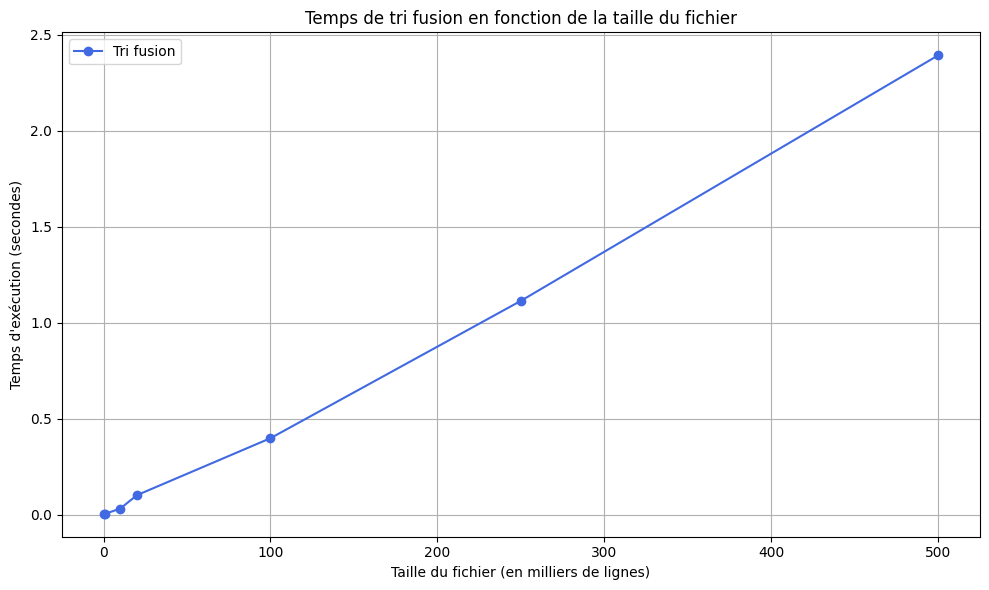

In [ ]:
import matplotlib.pyplot as plt

# Données extraites de tes résultats
tailles = [100, 1000, 10000, 20000, 100000, 250000, 500000]
temps =  [0.004, 0.004, 0.031, 0.101, 0.398, 1.114, 2.394]

# Conversion en milliers pour l'axe X
tailles_k = [t // 1000 for t in tailles]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(tailles_k, temps, marker='o', linestyle='-', color='royalblue', label='Tri fusion')

# Annotation
plt.title("Temps de tri fusion en fonction de la taille du fichier")
plt.xlabel("Taille du fichier (en milliers de lignes)")
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Affichage
plt.show()


> **Note**  
>la courbe montre clairement la croissance du temps de tri avec la taille du fichier. Elle illustre bien la complexité O(nlogn) du tri fusion.

##### Visualisation des résultats de l'algo tri a bulle (complexité O(n2)) :

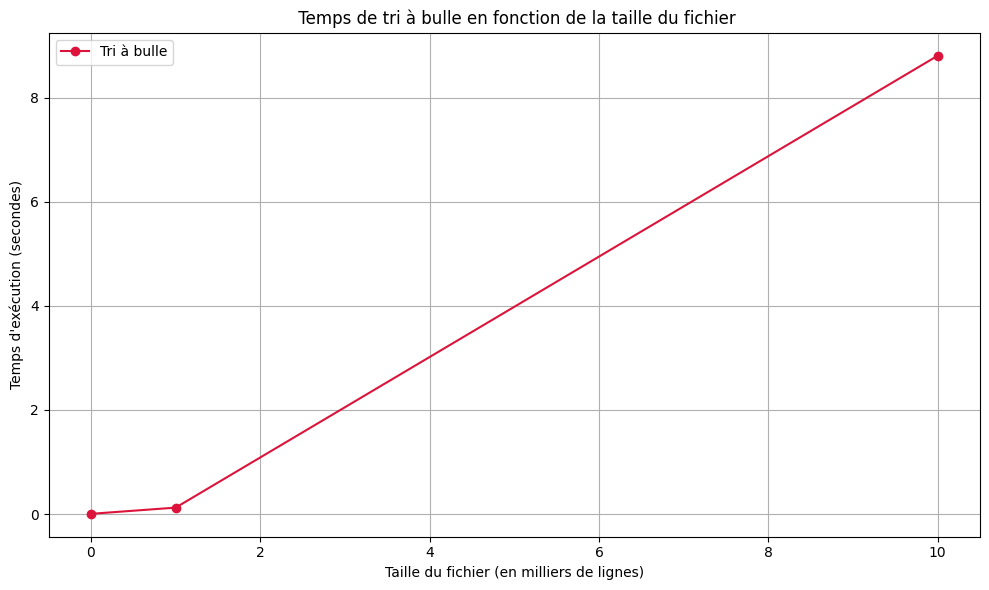

In [ ]:
import matplotlib.pyplot as plt

# Données du tri à bulle
tailles = [100, 1000, 10000]  # 100000 est exclu car non terminé
temps =  [0.004, 0.123, 8.807]

# Conversion en milliers pour l'axe X
tailles_k = [t // 1000 for t in tailles]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(tailles_k, temps, marker='o', linestyle='-', color='crimson', label='Tri à bulle')

# Annotation
plt.title(" Temps de tri à bulle en fonction de la taille du fichier")
plt.xlabel("Taille du fichier (en milliers de lignes)")
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Affichage
plt.show()


> **Note**  
>une courbe explosive dès 10 000 lignes, typique d’un algorithme en O(n2)